# Quesitions or goal

# Technical analysis for cryptocurrency
#Goal to find if there is selling or buying signal

#based on the short term moving average and long term moving average 

#short term moving average:The 50-day moving average is calculated by summing up the past 50 data points and dividing the result by 50

#long term moving average:The 200-day moving average is calculated by summing the past 200 days and dividing the result by 200

#what happen if short term moving average crossover the long term moving average?

# Moving Average crossovers:

#When a shorter-term moving average crosses bellow a longer-term moving average, it can signal a bearish trend and potential sell opportunities.


#When short-term moving averages cross above a long-term moving average (like the 50-day ma crossing above the 200-day MA crossing above the 200 days 
MA), it can signal bullish trend and potential buying opportunities.

# Volume Analysis: 
#consider trading volume alongside price movements to gauge the strength of a potential trend.
#the number of coins or tokens traded in a given period.
# Vizualization:
#ploting of the close price of the 4 cryptocurrency

#ploting of the open and close price of the 4 cryptocurrency

#ploting of the moving average(short and long term moving average) of the 4 cryptocurrency.


#correlation and linear regression of the trade-count and volume of the bitcoin.


In [511]:
# Dependencies
import pandas as pd
import numpy as np
#import math
#import datetime as dt
import matplotlib.pyplot as plt
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from plotly.subplots import make_subplots
import scipy.stats as st

# observations
#there is upward or going up on all of the cryptocurrency on april,2024 and we observed that there is change with time.

#we observe the open-close price moving together.

#we observed that april,2024 shortterm moving average crossover the long term moving average on four crypto(bitcoin,dogecoin,shiba inu,and Ethrium)

#it is the time need to buy the crypto(showing buying opportunities )

#july,2024 the short-term moving average cross bellow the long term moving average.(showing selling opportunities)

#there is positive relationship between the volume of the bitcoin dataset and bitcoin trade_count.

#there is 89% of the variability in the dataset.

In [449]:
# No keys required for crypto data
client = CryptoHistoricalDataClient()
request_params = CryptoBarsRequest(
  symbol_or_symbols=["BTC/USD"],
  timeframe=TimeFrame.Day,
  start="2023-01-01",
  end="2024-10-10")
# Retrieve daily bars for Bitcoin in a DataFrame and printing it
btc_bars = client.get_crypto_bars(request_params)

# dogecoin Fataframe
request_params = CryptoBarsRequest(
  symbol_or_symbols=["Doge/USD"],
  timeframe=TimeFrame.Day,
  start="2023-01-01",
  end="2024-10-10")
Doge_bars = client.get_crypto_bars(request_params)
# Shiba inu
request_params = CryptoBarsRequest(
  symbol_or_symbols=["SHIB/USD"],
  timeframe=TimeFrame.Day,
  start="2023-01-01",
  end="2024-10-10")
SHIB_bars = client.get_crypto_bars(request_params)
# Ethrium DataFrame
request_params = CryptoBarsRequest(
  symbol_or_symbols=["ETH/USD"],
  timeframe=TimeFrame.Day,
  start="2023-01-01",
  end="2024-10-10")
ETH_bars = client.get_crypto_bars(request_params)




In [450]:
#Visualization

In [451]:
# lets Save to  CSV 
btc_bars.df.to_csv("data/btc_out_put.csv",index=True)
Doge_bars.df.to_csv("data/doge_out_pu.csv",index=True)
SHIB_bars.df.to_csv("data/shiba_out_put.csv",index=True)
ETH_bars.df.to_csv("data/ethrium_out_put.csv",index=True)



In [510]:
# lets read the Csv
btc_df=pd.read_csv("data/btc_out_put.csv")
doge_df=pd.read_csv("data/doge_out_pu.csv")
shiba_df=pd.read_csv("data/shiba_out_put.csv")
Eth_df=pd.read_csv("data/ethrium_out_put.csv")


# Data processing,cleaning and manipulating 

In [453]:
#we need to convert the timestamp to date format of each cry
btc_date=pd.DatetimeIndex(btc_file_df["timestamp"])
btc_datetime_index=btc_date.date

doge_date=pd.DatetimeIndex(doge_df["timestamp"])
doge_datetime_index=doge_date.date

shiba_date=pd.DatetimeIndex(shiba_df["timestamp"])
shiba_datetime_index=shiba_date.date

eth_date=pd.DatetimeIndex(Eth_df["timestamp"])
eth_datetime_index=eth_date.date

In [454]:
# we need to extract only open,close,symbol and volume of the data for each crypto.
btc_open=btc_df["open"]
btc_close=btc_df["close"]
btc_volume=btc_df["volume"]
btc_symbol=btc_df["symbol"]
# DogeCoin
doge_open=doge_df["open"]
doge_close=doge_df["close"]
doge_volume=doge_df["volume"]
doge_symbol=doge_df["symbol"]
 # for Shiba Inu
shb_open=shiba_df["open"]
shb_close=shiba_df["close"]
shb_volume=shiba_df["volume"]
shb_symbol=shiba_df["symbol"]
# for Ethrium
eth_open=Eth_df["open"]
eth_close=Eth_df["close"]
eth_volume=Eth_df["volume"]
eth_symbol=Eth_df["symbol"]


# now we can create clean dataframe.based on what we filtered

In [494]:
# now we can create clean dataframe.based on what we filtered
bitcoin_df=pd.DataFrame({"Symbol":btc_symbol,"Date":btc_datetime_index,"open":btc_df["open"],"close":btc_df["close"],
                         "volume":btc_df["volume"],"Trade_count":btc_df["trade_count"]})

dogecoin_df=pd.DataFrame({"Symbol":doge_df["symbol"],"Date":doge_datetime_index,"open":doge_df["open"],"close":doge_df["close"],
                         "volume":doge_df["volume"]})
shibacoin_df=pd.DataFrame({"Symbol":shiba_df["symbol"],"Date":shiba_datetime_index,"open":shiba_df["open"],"close":shiba_df["close"],
                         "volume":shiba_df["volume"]})
Ethriumcoin_df=pd.DataFrame({"Symbol":Eth_df["symbol"],"Date":eth_datetime_index,"open":Eth_df["open"],"close":Eth_df["close"],
                         "volume":Eth_df["volume"]})

# sorting out of the Data

In [495]:
bitcoin_sorted=bitcoin_df.sort_values(by="Date",ascending=False)
bitcoin_sorted

,Symbol,Date,open,close,volume,Trade_count
647,BTC/USD,2024-10-09,62326.2450,60820.1600,0.642816,75.0
646,BTC/USD,2024-10-08,62646.0260,62298.1800,1.024808,87.0
645,BTC/USD,2024-10-07,63524.0355,62680.2800,2.180663,107.0
644,BTC/USD,2024-10-06,61881.4250,63474.6780,1.419522,61.0
643,BTC/USD,2024-10-05,61981.3160,61884.3245,0.286004,39.0
...,...,...,...,...,...,...
4,BTC/USD,2023-01-05,16838.4700,16803.4700,2580.410943,57481.0
3,BTC/USD,2023-01-04,16852.6200,16840.5000,4847.939963,81942.0
2,BTC/USD,2023-01-03,16721.0100,16850.5900,3790.536364,64904.0
1,BTC/USD,2023-01-02,16644.3700,16718.8200,2285.656433,41468.0


In [496]:
doge_sorted=dogecoin_df.sort_values(by="Date",ascending=False)

In [497]:
shibacoin_sorted=shibacoin_df.sort_values(by="Date",ascending=False)

In [498]:
ethrium_sorted=Ethriumcoin_df.sort_values(by="Date",ascending=False)

# plotting Date vs Close price

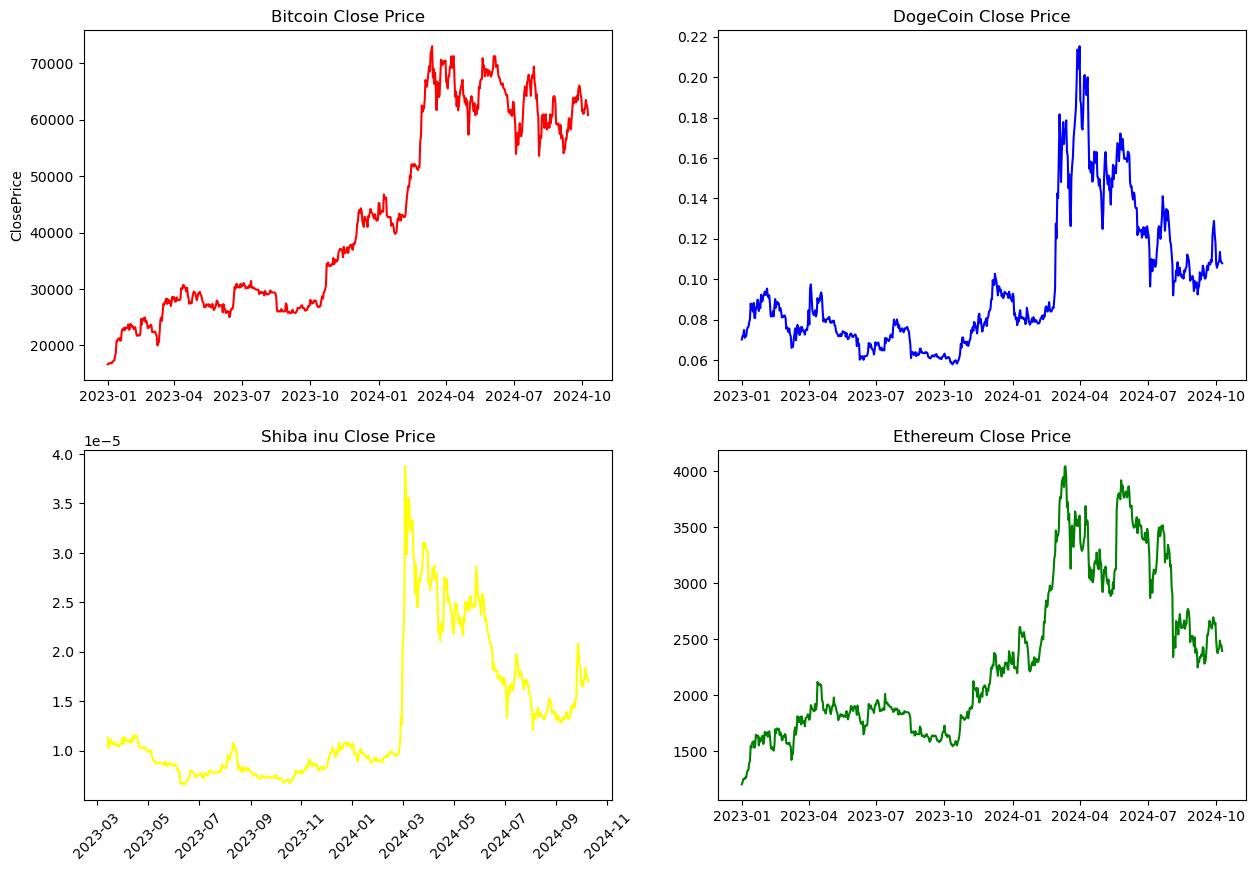

In [499]:
# Date vs Closeprice
fig = plt.figure(figsize = (15,10))

plt.subplot(221)
plt.plot(bitcoin_df['Date'], bitcoin_df['close'], color="red")
plt.title('Bitcoin Close Price')
#plt.xticks(rotation=45)
plt.ylabel("ClosePrice")

plt.subplot(222)
plt.plot(dogecoin_df['Date'], dogecoin_df['close'], color="blue")
plt.title('DogeCoin Close Price')
#plt.xticks(rotation=45)



plt.subplot(223)
plt.plot(shibacoin_df['Date'],shibacoin_df['close'], color="yellow")
plt.title('Shiba inu Close Price')
plt.xticks(rotation=45)

plt.subplot(224)
plt.plot(Ethriumcoin_df['Date'], Ethriumcoin_df['close'], color="green")
plt.title('Ethereum Close Price')
plt.show()

# plotting Date vs close price and open price

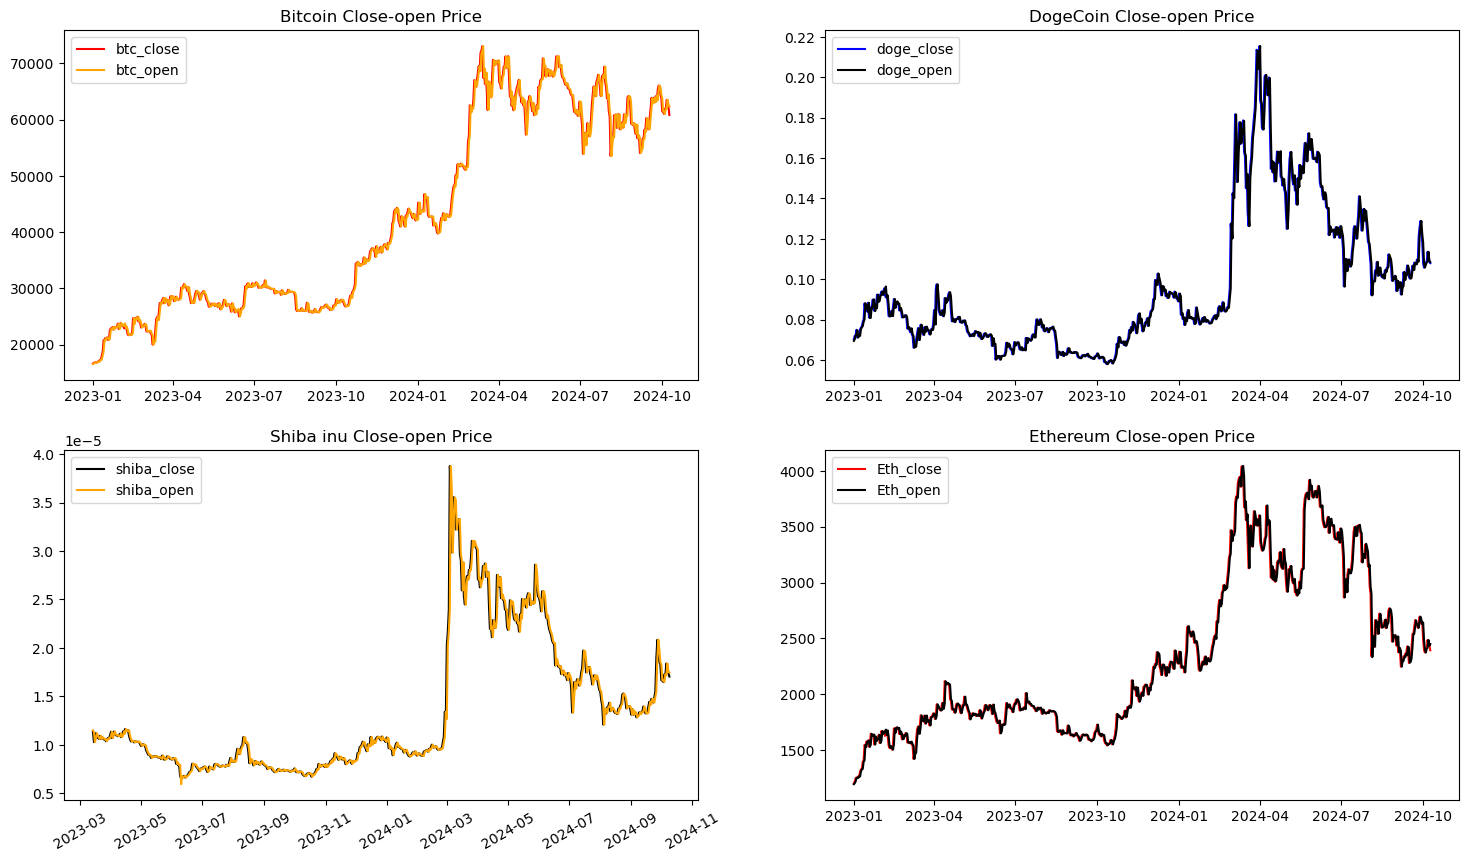

In [500]:
fig = plt.figure(figsize = (18,10))

plt.subplot(221)
plt.plot(bitcoin_df['Date'], bitcoin_df['close'], color="red")
plt.plot(bitcoin_df['Date'], bitcoin_df['open'], color="orange")
plt.legend(loc="upper left",labels=("btc_close","btc_open"))
plt.title('Bitcoin Close-open Price')
#plt.xticks(rotation=45)
#plt.ylabel("ClosePrice")


plt.subplot(222)
plt.plot(dogecoin_df['Date'], dogecoin_df['close'], color="blue")
plt.plot(dogecoin_df['Date'], dogecoin_df['open'], color="black")
plt.legend(loc="upper left",labels=("doge_close","doge_open"))
plt.title('DogeCoin Close-open Price')
#plt.xticks(rotation=45)




plt.subplot(223)
plt.plot(shibacoin_df['Date'],shibacoin_df['close'], color="black")
plt.plot(shibacoin_df['Date'],shibacoin_df['open'], color="orange")
plt.legend(loc="upper left",labels=("shiba_close","shiba_open"))
plt.title('Shiba inu Close-open Price')
plt.xticks(rotation=30)

plt.subplot(224)
plt.plot(Ethriumcoin_df['Date'], Ethriumcoin_df['close'], color="red")
plt.plot(Ethriumcoin_df['Date'], Ethriumcoin_df['open'], color="black")
plt.legend(loc="upper left",labels=("Eth_close","Eth_open"))
plt.title('Ethereum Close-open Price')
plt.show()

# plotting Moving Average

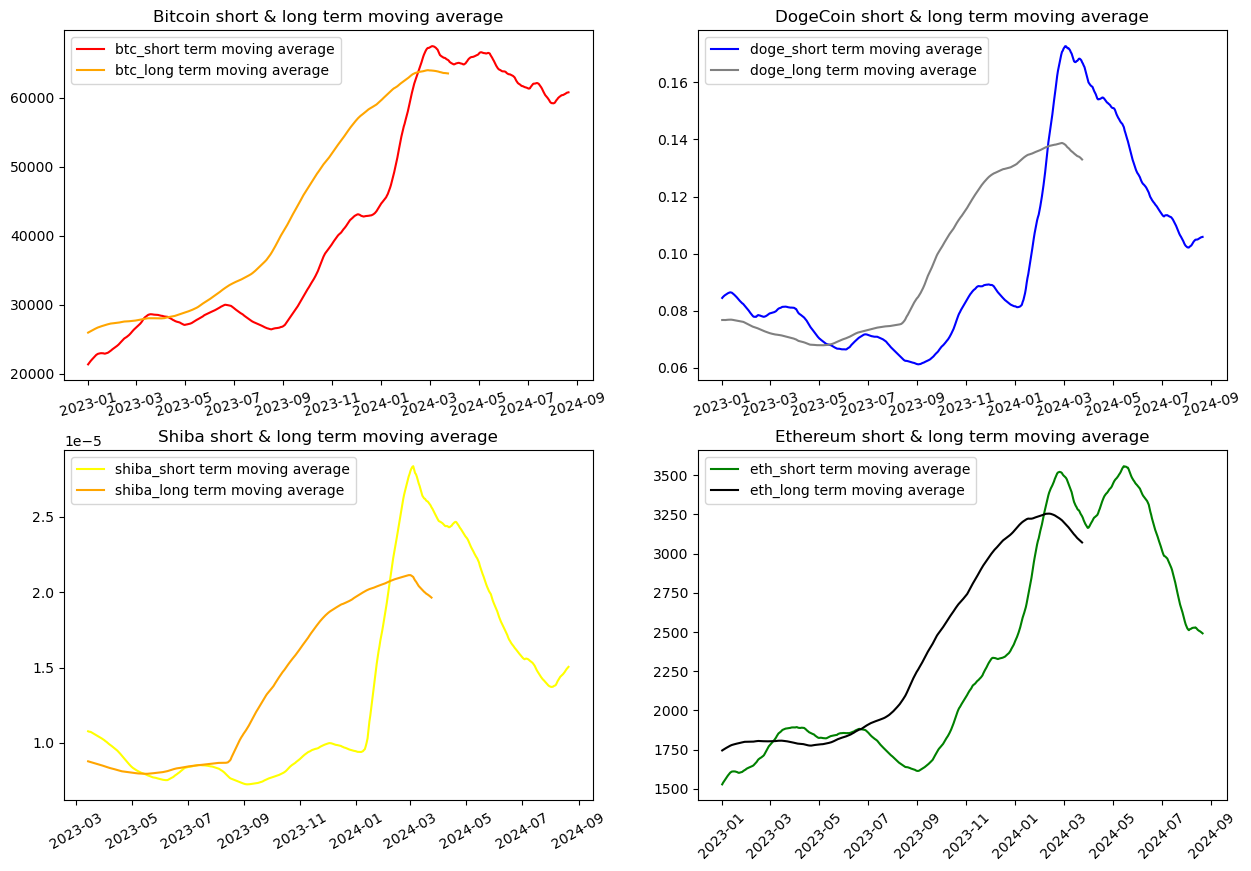

In [501]:
# to see if there is buying and selling signal based on the recent 50 and 200 dataset.
fig = plt.figure(figsize = (15,10))

plt.subplot(221)
plt.plot(bitcoin_sorted['Date'], bitcoin_sorted['close'].rolling(50).mean(), color="red")
plt.plot(bitcoin_sorted['Date'], bitcoin_sorted['close'].rolling(200).mean(), color="orange")
plt.legend(loc="upper left",labels=("btc_short term moving average","btc_long term moving average"))
plt.title('Bitcoin short & long term moving average')
plt.xticks(rotation=15)
#plt.ylabel("ClosePrice")


plt.subplot(222)
plt.plot(doge_sorted['Date'], doge_sorted['close'].rolling(50).mean(), color="blue")
plt.plot(doge_sorted['Date'], doge_sorted['close'].rolling(200).mean(), color="grey")
plt.title('DogeCoin short & long term moving average')
plt.legend(loc="upper left",labels=("doge_short term moving average","doge_long term moving average"))
plt.xticks(rotation=15)




plt.subplot(223)
plt.plot(shibacoin_sorted['Date'],shibacoin_sorted['close'].rolling(50).mean(), color="yellow")
plt.plot(shibacoin_sorted['Date'],shibacoin_sorted['close'].rolling(200).mean(), color="orange")
plt.legend(loc="upper left",labels=("shiba_short term moving average","shiba_long term moving average"))
plt.title('Shiba short & long term moving average')
plt.xticks(rotation=30)


plt.subplot(224)
plt.plot(ethrium_sorted['Date'], ethrium_sorted['close'].rolling(50).mean(), color="green")
plt.plot(ethrium_sorted['Date'], ethrium_sorted['close'].rolling(200).mean(), color="black")
plt.legend(loc="upper left",labels=("eth_short term moving average","eth_long term moving average"))
plt.title('Ethereum short & long term moving average')
plt.xticks(rotation=45)
plt.show()




# Plotting correlatiokn and linear regression

In [505]:
# lets calculate the correlation and regression of the close price and volume of the bitcoin.

bitcoin_cor=st.pearsonr(bitcoin_sorted["Trade_count"],bitcoin_sorted["volume"])
bitcoin_cor

PearsonRResult(statistic=0.9457527531628822, pvalue=1.259241e-317)

In [506]:
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(bitcoin_sorted["Trade_count"],bitcoin_sorted["volume"])
(slope, intercept, rvalue, pvalue, stderr)

(0.04115866559055086,
 120.98192300365076,
 0.9457527531628823,
 1.259241e-317,
 0.000556288510849477)

In [507]:
#y=mx+b
regress_value=bitcoin_sorted["Trade_count"]*slope+intercept


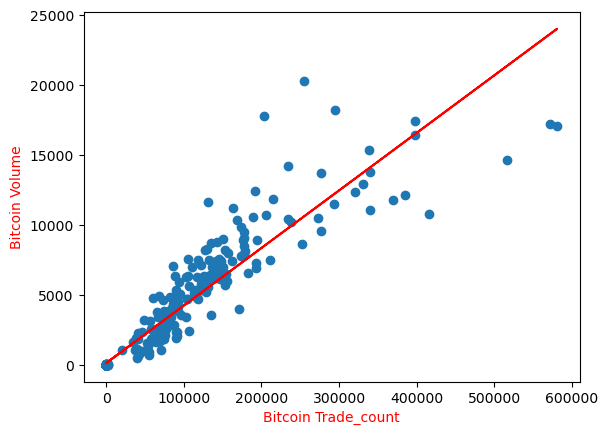

In [508]:
plt.scatter(bitcoin_sorted["Trade_count"],bitcoin_sorted["volume"])
plt.plot(bitcoin_sorted["Trade_count"],regress_value,color="red")
plt.xlabel("Bitcoin Trade_count",color="r")
plt.ylabel("Bitcoin Volume",color="r")
plt.show()

In [509]:
r_squared=rvalue**2
print(round(r_squared,2))

0.89
